In [9]:
'''Volatility Breakthrough Strategy-larry williams
buy : starting price + previous day's fluctuation range * 0.5 
sell : the closing price of the day. 
investment target : KODEX kosdaq 150(ticker : 229200)
+ previous day's fluctuation range : (previous day's)closing price- starting price
'''
import pandas as pd

df=pd.read_excel("data/229200.xlsx", index_col="날짜")
df.columns=['starting price','high price','low price','closing price','volume']
df

,starting price,high price,low price,closing price,volume
날짜,,,,,
2015-10-01,10279,10279,10211,10216,30032
2015-10-02,10250,10275,10250,10263,60029
2015-10-05,10374,10384,10326,10347,40976
2015-10-06,10365,10392,10287,10291,40252
2015-10-07,10211,10211,10061,10062,20248
...,...,...,...,...,...
2021-09-02,15095,15160,15045,15105,1874702
2021-09-03,15115,15215,15085,15175,1388557
2021-09-06,15170,15270,15110,15185,2252617


In [10]:
df['changed price']=df['high price']-df['low price']
df.head()

,starting price,high price,low price,closing price,volume,changed price
날짜,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68
2015-10-02,10250,10275,10250,10263,60029,25
2015-10-05,10374,10384,10326,10347,40976,58
2015-10-06,10365,10392,10287,10291,40252,105
2015-10-07,10211,10211,10061,10062,20248,150


In [11]:
df['previous price']=df['changed price'].shift(1)
df.head()

,starting price,high price,low price,closing price,volume,changed price,previous price
날짜,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0
2015-10-06,10365,10392,10287,10291,40252,105,58.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0


In [12]:
df['target price']=df['starting price']+df['previous price']*0.5
df.head()

,starting price,high price,low price,closing price,volume,changed price,previous price,target price
날짜,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5


In [13]:
import numpy as np

'''
The first argument of np.where() specifies the condition, 
the second argument df['closing price'] / df['target price'] is the value 
to be returned if the condition is True, 
and the third argument 1 is the value to be returned 
if the condition is False.'''
df['Return']=np.where(df['high price']>=df['target price'],df['closing price']/df['target price'],1)
df.head()

,starting price,high price,low price,closing price,volume,changed price,previous price,target price,Return
날짜,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.0
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.0
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.0
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.0
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.0


In [14]:
'''df['Return'].cumprod() calculates the cumulative product 
of the values in the 'Return' column of the DataFrame df
'''
df['cumulative return']=df['Return'].cumprod()
df.tail()

,starting price,high price,low price,closing price,volume,changed price,previous price,target price,Return,cumulative return
날짜,,,,,,,,,,
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993
2021-09-07,15165,15235,15120,15235,819776,115,160.0,15245.0,1.000000,2.202993
2021-09-08,15170,15180,14900,14925,1459414,280,115.0,15227.5,1.000000,2.202993


In [15]:
delta=df.index[-1]-df.index[0]
year=delta.days/365
CAGR=df['cumulative return'].iloc[-1]**(1/year)-1
print(CAGR*100)

14.214796770147164


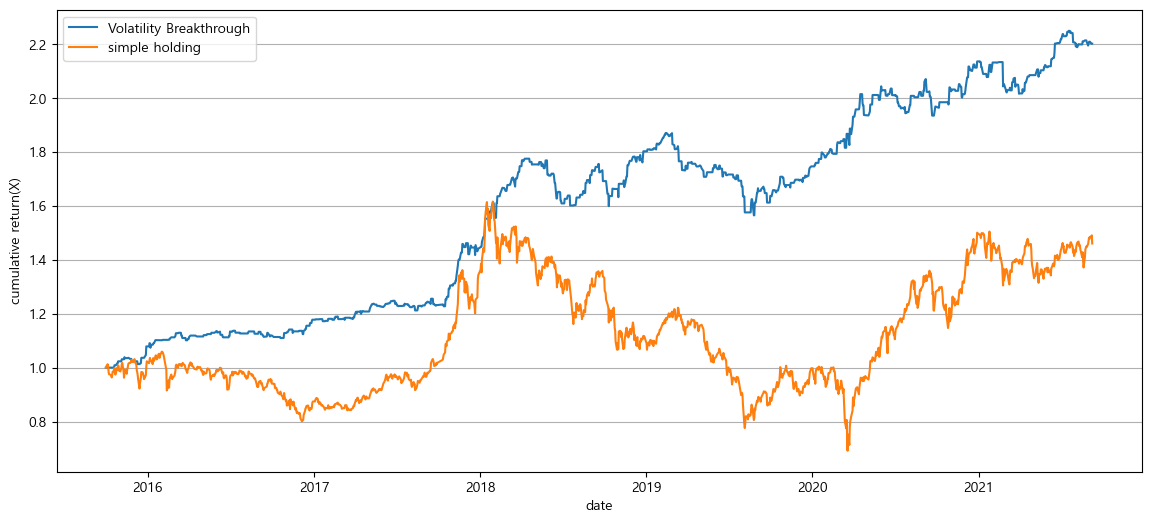

In [16]:
import matplotlib.pyplot as plt
import platform

if platform.system()=='Darwin':
    plt.rc('font',family='AppleGothic')
else:
    plt.rc('font',family='Malgun Gothic')
fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)
ax.plot(df['cumulative return'],label="Volatility Breakthrough")
ax.plot(df['closing price']/df['closing price'].iloc[0], label="simple holding")

plt.xlabel('date')
plt.ylabel('cumulative return(X)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [17]:
df['previous high']=df['cumulative return'].cummax()
df['DD']=(1-df['cumulative return']/df['previous high'])*100
df.tail()

,starting price,high price,low price,closing price,volume,changed price,previous price,target price,Return,cumulative return,previous high,DD
날짜,,,,,,,,,,,,
2021-09-02,15095,15160,15045,15105,1874702,115,190.0,15190.0,1.000000,2.209883,2.251132,1.832337
2021-09-03,15115,15215,15085,15175,1388557,130,115.0,15172.5,1.000165,2.210247,2.251132,1.816161
2021-09-06,15170,15270,15110,15185,2252617,160,130.0,15235.0,0.996718,2.202993,2.251132,2.138393
2021-09-07,15165,15235,15120,15235,819776,115,160.0,15245.0,1.000000,2.202993,2.251132,2.138393
2021-09-08,15170,15180,14900,14925,1459414,280,115.0,15227.5,1.000000,2.202993,2.251132,2.138393


In [18]:
df['DD'].max()

16.335015560662914

E:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


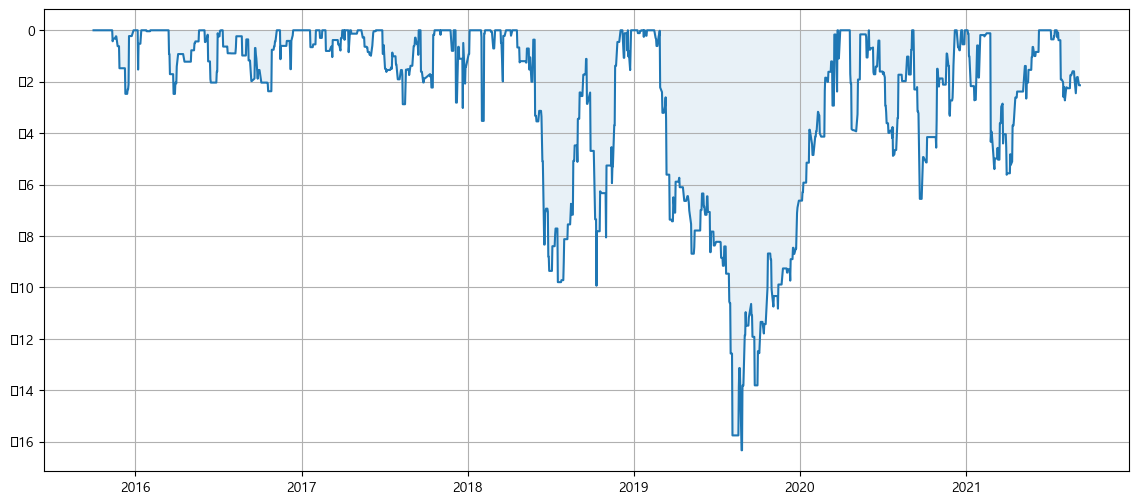

In [19]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)

ax.plot(df.index,df['DD']*-1)
ax.fill_between(df.index,df['DD']*-1,alpha=0.1)
ax.grid()
plt.show()

In [20]:
'''addition of market timing Strategy
market timing Strategy : 
buy : when the market grows.
(when the price is higher than MA10)
sell : when the market goes down
'''
df['MA10']=df['closing price'].rolling(window=10).mean()
df.head(n=10)

,starting price,high price,low price,closing price,volume,changed price,previous price,target price,Return,cumulative return,previous high,DD,MA10
날짜,,,,,,,,,,,,,
2015-10-01,10279,10279,10211,10216,30032,68,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2015-10-02,10250,10275,10250,10263,60029,25,68.0,10284.0,1.0,1.0,1.0,0.0,NaN
2015-10-05,10374,10384,10326,10347,40976,58,25.0,10386.5,1.0,1.0,1.0,0.0,NaN
2015-10-06,10365,10392,10287,10291,40252,105,58.0,10394.0,1.0,1.0,1.0,0.0,NaN
2015-10-07,10211,10211,10061,10062,20248,150,105.0,10263.5,1.0,1.0,1.0,0.0,NaN
2015-10-08,10118,10137,9898,9968,40068,239,150.0,10193.0,1.0,1.0,1.0,0.0,NaN
2015-10-12,9966,9966,9936,9943,40071,30,239.0,10085.5,1.0,1.0,1.0,0.0,NaN
2015-10-13,9983,9983,9891,9892,20026,92,30.0,9998.0,1.0,1.0,1.0,0.0,NaN
2015-10-14,9886,9917,9842,9844,22141,75,92.0,9932.0,1.0,1.0,1.0,0.0,NaN


In [21]:
df['buy timing']=df['starting price']>df['MA10'].shift(1)

In [22]:
df['Return2']=np.where((df['buy timing']==1)&(df['high price']>=df['target price']),df['closing price']/df['target price'],1)
df['cumulative return2']=df['Return2'].cumprod()
print(df['cumulative return2'])

날짜
2015-10-01    1.000000
2015-10-02    1.000000
2015-10-05    1.000000
2015-10-06    1.000000
2015-10-07    1.000000
                ...   
2021-09-02    1.620460
2021-09-03    1.620727
2021-09-06    1.615408
2021-09-07    1.615408
2021-09-08    1.615408
Name: cumulative return2, Length: 1462, dtype: float64


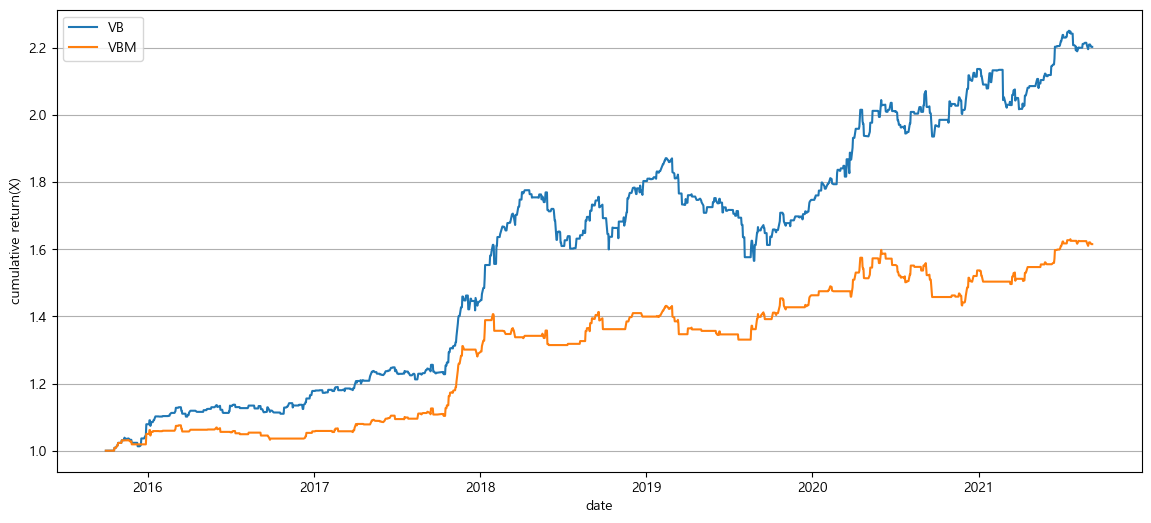

In [23]:
import matplotlib.pyplot as pltt
import platform

if platform.system()=='Darwin':
    plt.rc('font',family='AppleGothic')
else:
    plt.rc('font',family='Malgun Gothic')
    
fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)
ax.plot(df['cumulative return'],label="VB")
ax.plot(df['cumulative return2'],label="VBM")

plt.xlabel('date')
plt.ylabel('cumulative return(X)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [28]:
df['previous high2']=df['cumulative return2'].cummax()
df['DD2']=(1-df['cumulative return2']/df['previous high2'])*100

E:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


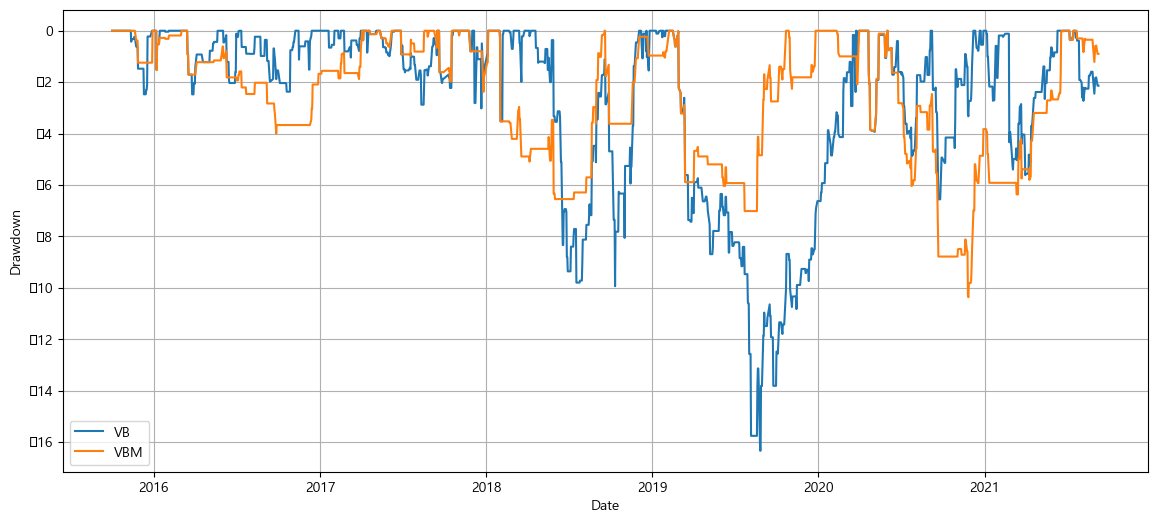

In [29]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)

ax.plot(df.index, df['DD']*-1, label='VB')
ax.plot(df.index, df['DD2']*-1, label='VBM')

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc='best')
plt.show()

In [ ]:
'''
output:
return
VB>VBM(Volatility Breakthrough+ timing Strategy)
MDD
VBM>VB
'''